### 参考
[1] EchoCaiCai, http://blog.csdn.net/cl1143015961/article/details/41081183

In [46]:
%matplotlib inline
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

### alpha 值的选择
指数平滑法中最重要的一个参数是平滑常数α，α的取值范围是[0-1]，α值是主观选定的，值越大表示对未来的预测中越近期的数据权重越大。在市场预测中，α的确定方法，一般是先根据经验做一个大概的预估，基本判断标准如下：
1. 时间序列比较平稳时，选择较小的α值，0.05-0.20。
2. 时间序列有波动，但长期趋势没大的变化，可选稍大的α值，0.10-0.40。
3. 时间序列波动很大，长期趋势变化大有明显的上升或下降趋势时，宜选较大的α值，0.60-0.80。
4. 当时间序列是上升或下降序列，满足加性模型，α取较大值，0.60-1。

再重复试算过程，比较不同α值下，预测的标准误差，从而选取误差较小的α值来建立模型。

In [71]:
dta100 = [2,1,58,5,10,92,85,47,90,87,1,97,15,25,91,20,53,72,18,42,8,70,42,41,87,83,38,89,67,8,53,42,26,53,83,44,44,74,68,46,62,58,38,41,68,48,8,2,26,98,46,15,20,94,55,91,45,46,2,51,73,96,88,87,27,37,3,34,45,88,60,54,45,53,70,7,50,3,92,12,80,3,58,19,73,82,35,54,68,98,27,34,52,95,9,10,60,67,19,70]
dta20  = [7,10,14,1,4,6,17,16,2,13,10,17,18,6,12,19,17,4,6,16]
dta90  = [10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]

dtanum = 90
alpha = 0.7

dta=np.array(dta,dtype=np.float)

In [72]:
y = dta90
s = [0 for i in range(dtanum)]

s[1] = y[1]
for t in range(1, dtanum-1):
    s[t+1] = alpha * y[t] + (1 - alpha) * s[t]

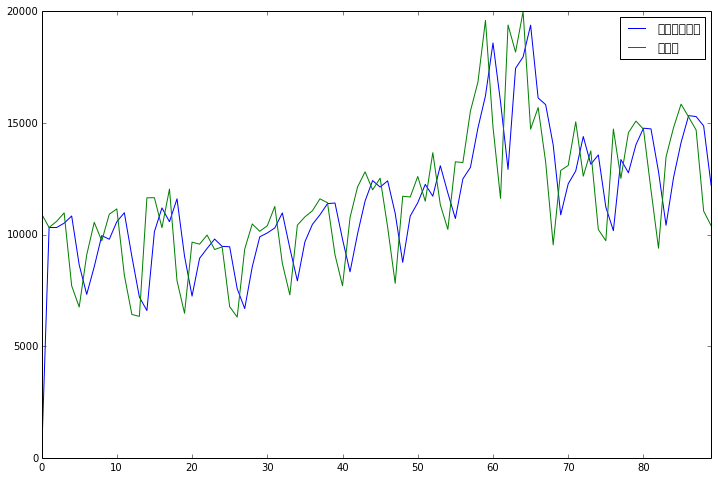

In [73]:

s1=pd.Series(y)
s2=pd.Series(s)
df = pd.DataFrame({"真实值":s1,"一次指数平滑":s2})
df.plot(figsize=(12,8))